In [1]:
import wget
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_name  = "Housing.csv"

In [10]:
# Загрузка данных
df = pd.read_csv("Assets/Housing.csv")
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [11]:
df1=df[['median_house_value']]

#### Красиво покажем медиану по стоимости

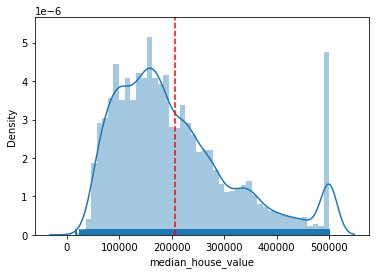

In [13]:
# основной график
ax = sns.distplot(df1['median_house_value'], rug=True, hist=True)

# доп. визуализация
avg1 = int(df1.mean())
plt.axvline(x=avg1,
           linestyle = '--',
           color = 'red')


#### ECDF (Выборочная функция распределения)

Это приближение теоретической функции распределения, построенное с помощью выборки

In [14]:
def ecdf(data):
    n = len(data)
    # x-data ECDF
    x = np.sort(data)
    # y-data ECDF
    y = np.arange(1, len(x)+1) / n
    return x, y

#### Расчет квартилей

При использовании функции обратим внимание на то, что "идеальный" порог должен быть ниже 0.1 (10%)

In [16]:
def quartiles(data, threshold):
    quarts = df1.quantile([threshold, 1 - threshold])
    quart1 = quarts.iloc[0]
    quart2 = quarts.iloc[1]
    return quart1, quart2

#### Расчет

In [19]:
threshold = 0.03

quart1, quart2 = quartiles(df1, threshold)
print('Персентили с порогом {} :\n|{} % : {}\n|{} % : {}'.format(threshold,
                                                                                         threshold * 100,
                                                                                         quart1[0],
                                                                                         (1 - threshold) * 100,
                                                                                         quart2[0]))

Персентили с порогом 0.03 :
|3.0 % : 58800.0
|97.0 % : 500001.0


### Правильная визуализация функции распределения

In [21]:
def plot_ecdf_distribution(data, quart1, quart2, avg):
    # Установка цветов
    primary_color   = '#1F00AA'
    secondary_color = '#F74600'
    value_color     = '#2F1557'
    subcolor        = '#32B132'

    # отбор результатов по ECDF
    x, y = ecdf(data['median_house_value'])
    sns.set_style('whitegrid')
    plt.figure('fig_size'==(25,15))
    plt.plot(x, y, marker='.',
                 linestyle='none',
                 color = value_color,
                 alpha = 0.8)
    plt.margins(0.02)
    
    # Обозначим границы данных относительно персентилей
    percentiles = np.array([50])
    df_perc = np.percentile(data['median_house_value'],
                            percentiles)
    
    
    # именование осей    
    plt.ylabel('ECDF',
                   fontsize = 12)

    # визуализация
    plt.plot(df_perc, percentiles/100, marker='D', color='red', linestyle='none', markersize = 10)

    # дополнительные линии (вертикаль)
    plt.axvline(x = df_perc, color = primary_color)
    plt.axvline(x = avg, color = subcolor)
    plt.axvline(x = quart1, color = secondary_color, linestyle = '--')
    plt.axvline(x = quart2, color = secondary_color, linestyle = '--')

    # дополнительные линии (горизонталь)
    plt.axhline(y = 0.5, color = primary_color)
    plt.axhline(y = threshold, color = secondary_color, linestyle = '--')
    plt.axhline(y = 1 - threshold, color = secondary_color, linestyle = '--')

    plt.tick_params(labelsize=12)

    # стиль
    plt.grid(b=True,
                 which='major',
                 color='#cccccc',
                 linestyle='--')

    # легенда
    patch = mpatches.Patch(color = value_color,
                           label='Dataset')

    plt.legend(handles=[patch],
                   loc = 'lower right',
                   fontsize = 14)
    
    return None

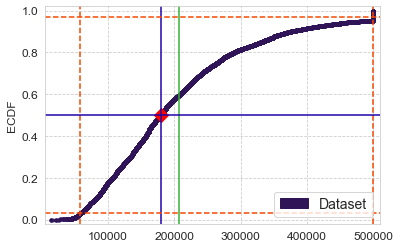

In [22]:
plot_ecdf_distribution(df1, quart1[0], quart2[0], avg1)

#### Отчистка данных относительно порога

In [26]:
len1 = df1.shape[0]
# обрезаем значения по выбранному порогу
df2= df1[df1['median_house_value'] > quart1[0]]
df2 = df2[df2['median_house_value'] < quart2[0]]
len2 = df2.shape[0]
len3=len1-len2
print('После отчистки данных мы потеряли {} и теперь в DF {} строк.'.format(len3,len2))  
print('Это {} %'.format(round(len3 / df1['median_house_value'].shape[0],2) * 100))

После отчистки данных мы потеряли 1591 и теперь в DF 19049 строк.
Это 8.0 %


#### Расчет на чистом DF

In [27]:
quart1, quart2 = quartiles(df2, threshold)
print('Персентили с порогом {} :\n|{} % : {}\n|{} % : {}'.format(threshold,
                                                                                         threshold * 100,
                                                                                         quart1[0],
                                                                                         (1 - threshold) * 100,
                                                                                         quart2[0]))

Персентили с порогом 0.03 :
|3.0 % : 58800.0
|97.0 % : 500001.0


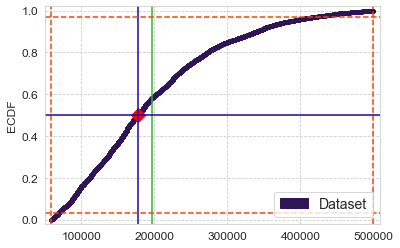

In [28]:
plot_ecdf_distribution(df2, quart1[0], quart2[0], df2['median_house_value'].mean())

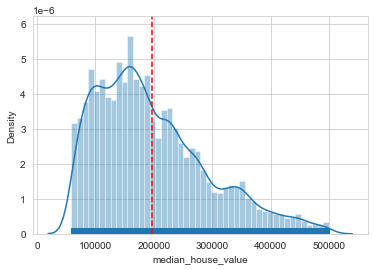

In [29]:
# Визуализация нового распределения
ax = sns.distplot(df2['median_house_value'], rug=True, hist=True)
avg1 = int(df2.mean())
plt.axvline(x=avg1,
           linestyle = '--',
           color = 'red')